# Week 9 - Morphology

### Import libraries

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### 3x3 Cross SED(Structuring Element Dilation) 

In [5]:
def image_dilation(F, w):
	# F: input image
	# w: structuring element
	# return: dilated output image
	p, q = F.shape

	output_image = np.zeros((p,q), dtype=np.uint8)
 
	# Generate SED
	SED = np.ones((w,w), dtype=np.uint8)
	c = int((w-1)/2)
 
	# Dilation
	for i in range(c, p-c):
		for j in range(c, q-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)
 
	return output_image


/tmp/ipykernel_24271/2577496554.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


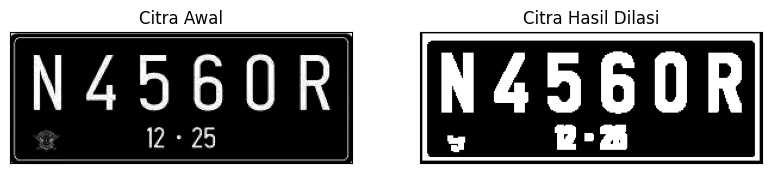

In [8]:
img_dilation = cv2.imread('./images/plat nomer.jpg', 0)
gamma_image = np.zeros(img_dilation.shape, dtype=np.uint8)

for y in range(img_dilation.shape[0]):
	for x in range(img_dilation.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_dilation[y,x]/255.0) ** (2/1), 0, 255)
  
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w=5
output_image = image_dilation(thresh,w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()